In [5]:
import sys

from qetu_sim import *

import numpy as np
import scipy.linalg
import itertools
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.transpiler import Layout
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import Permutation
from qiskit.visualization import *
from qiskit_aer import AerSimulator

In [6]:
u = 1
t = 1
delta_t = 1
n = 1
num_sites = 4

In [7]:
ref_H_matrix = ref_fh_hamiltonian(u=u, t=t)
ref_U_matrix = ref_fh_op(u=1, t=1, delta_t=1)

In [8]:
u = 1
t = 1
delta_t = 1
degree_list = range(2,51,2)
trotter_steps_list = range(1,2)
overlap_list = []
overlap_noise_list = []

for degree in degree_list:
    for trotter_steps in trotter_steps_list:
        print("Degree: " + str(degree) + "\t Trotter steps: " + str(trotter_steps))
        print("-------------------------")
        E_min, E_mu_m, E_mu_p, E_max = calculate_qsp_params(u, t)
        qsp = QSPPhase()
        phi_seq_su2 = qsp.cvx_qsp_heaviside(
            degree, 
            E_min,
            E_mu_m, 
            E_mu_p, 
            E_max
        )
        phi_vec = convert_Zrot_to_Xrot(phi_seq_su2)
        QETU_circ = construct_QETU_circ(u, t, trotter_steps, phi_vec)
        QETU_circ_WMI = transpile_QETU_to_WMI(QETU_circ)
        initial_state = Statevector.from_label("0-+0++++0")
        final_state = qetu_sim(QETU_circ_WMI, initial_state)
        ground_state_energy, ground_state_vector = calculate_reference_ground_state(u, t, True)
        success_probability = scipy.linalg.norm(final_state)**2
        overlap = abs(np.vdot(final_state / scipy.linalg.norm(final_state), ground_state_vector))**2
        print("overlap: " + str(overlap))
        #noise_model = wmi_grid_noise_model()
        #final_state_noise = qetu_sim_noise(QETU_circ_WMI, initial_state, noise_model)
        #overlap_noise = abs(np.vdot(final_state_noise / scipy.linalg.norm(final_state_noise), ground_state_vector))**2
        #print("overlap noise: " + str(overlap_noise))
        overlap_list.append(overlap)

Degree: 2	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.02999102998113102
Degree: 4	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.03495128948242853
Degree: 6	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.07966886141039753
Degree: 8	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.16578542723998158
Degree: 10	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.416173293914656
Degree: 12	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.5331749356879573
Degree: 14	 Trotter steps: 1
-------------------------

starting matlab engine..

stopping matlab engine..
overlap: 0.818418759516589
Degree: 16	 Trotter steps: 1
-------------------------

s

Text(0, 0.5, 'overlap')

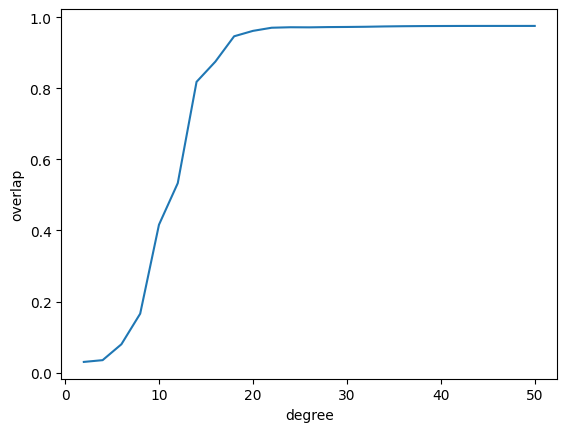

In [32]:
plt.plot(degree_list, overlap_list)
#plt.plot(degree_list, overlap_noise_list)
plt.xlabel("degree")
plt.ylabel("overlap")